# Multiple Linear Regression - Bike Share

In this notebook, you will use data from a bike sharing company to help predict the count of bikes rented on a given day. The columns of the data are as follows:

1. season: 1=winter, 2=spring, 3=summer, 4=fall
2. month: 1=January - 12=December
3. weekday: 0=Sunday - 6=Saturday
4. temperature: in degrees Celsius
5. humidity: Percentage
6. windspeed: kph
7. casual: the number of bikes rented for casual use
8. registered: the number of registered users renting a bike
9. count: the total number of bikes rented

## 1. Library Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("data/bike_share.csv")

## 2. Determine if we can use Multiple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed
* There should be no meaningful correlation between independent variables

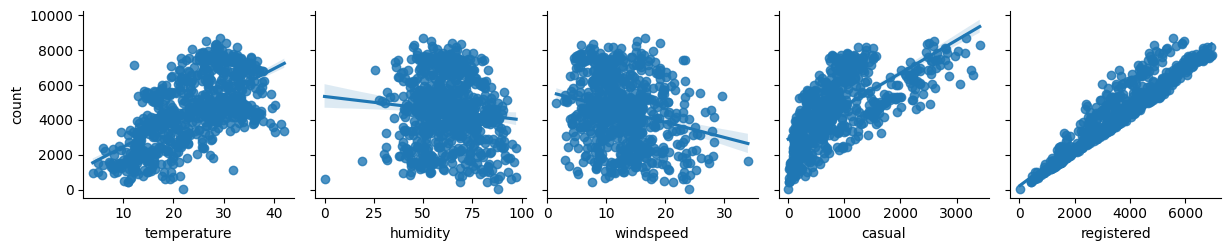

In [6]:
### CHECK #1: Check which of the columns are quantitative ###

# Get first 10 rows of data to analyze type of data
df.head()

# temperature, humidity, windspeed, casual, registered, and count are all quantitative.
# season, month, and weekday are not quantitative

### CHECK #2: Verify which quantitative values have linearity w/ count ###
sns.pairplot(df, x_vars=["temperature", 'humidity', "windspeed", "casual", "registered"], y_vars=["count"], kind="reg")

# Only temperature, casual, and registered are linear.
# Both windspeed and humidity don't appear to be linear... or have any significant correlation.

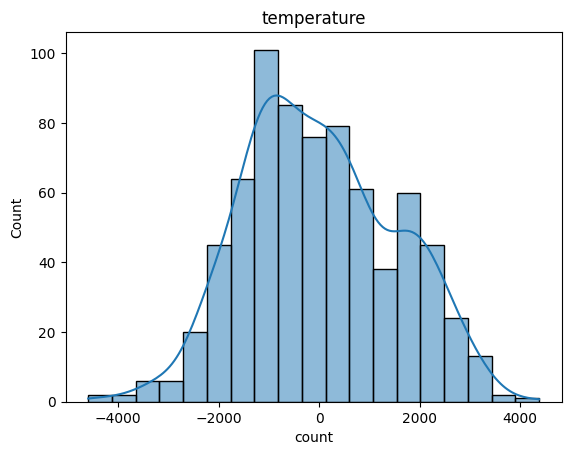

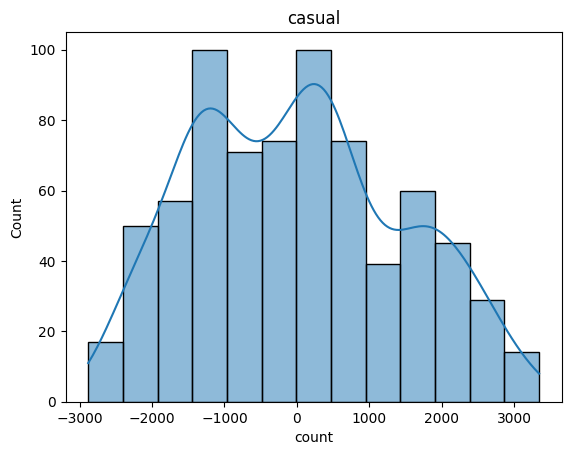

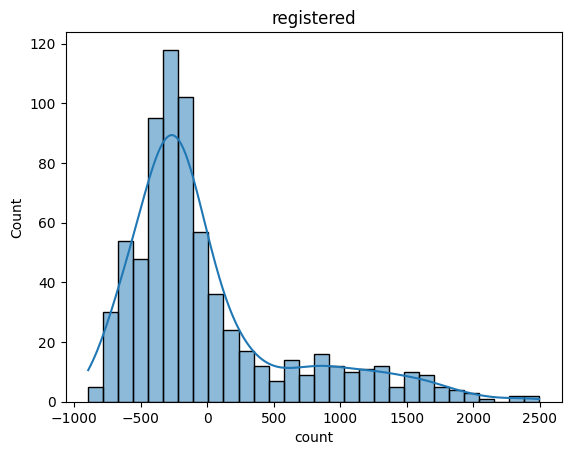

In [7]:
### CHECK #3: Check for normal distribution of residuals ###
linear_quantitative_features = ["temperature", "casual", "registered"]

for feature in linear_quantitative_features:
    model = LinearRegression()
    model.fit(df[[feature]], df['count'])
    y_pred = model.predict(df[[feature]])
    residuals = df['count'] - y_pred
    sns.histplot(residuals, kde=True)
    plt.title(feature)
    plt.show()

# Both temperature and registered have a normal distribution.
# Casual seems to have two peaks and is not centered at 0.
# I will not be using casual.

<Axes: >

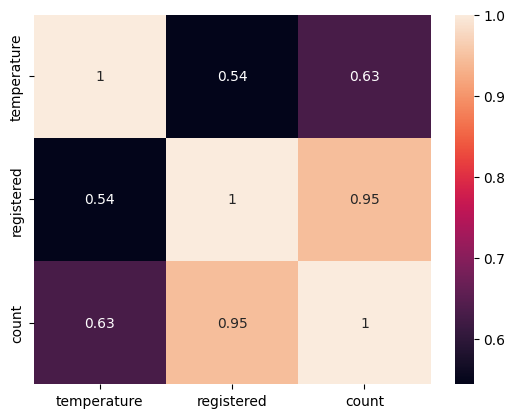

In [15]:
### CHECK #4: Check for high correlation between variables ###
linear_quantitative_df = df[[
                             "temperature",
                             "registered",
                             "count" 
                             ]]

sns.heatmap(linear_quantitative_df.corr(), annot=True)

# Temperature and registered have a medium strength correlation.

## 3. Feature Selection

In [16]:
# Backwards selection of features
selected_features = ["temperature", "registered"]
model = LinearRegression()
y_train = df['count']

while (len(selected_features) > 1):

    # Get initial score with current model
    X_train = df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    # Create variables for variable removal
    worst_feature = ""
    worst_score = 1

    # Find worst feature
    for feature in selected_features:
        selected_features_temp = selected_features.copy()
        selected_features_temp.remove(feature)

        X_train_temp = df[selected_features_temp]
        model.fit(X_train_temp, y_train)
        score = model.score(X_train_temp, y_train)

        if score < worst_score:
            worst_score = score
            worst_feature = feature
    
    # Check if feature is impactful enough to remove
    if (initial_score - worst_score) < 0.05:
        print("Dropped:", worst_feature, "(Score:", str(worst_score) + ")")
        selected_features.remove(worst_feature)
    else:
        print("Final Feature Set:", selected_features)
        print("Final Feature Score:", initial_score)
        break

Final Feature Set: ['temperature', 'registered']
Final Feature Score: 0.9131302916095627


## 4. Create Final Model based off of feature selection

In [17]:
final_model = LinearRegression()
final_X_train = df[selected_features]
final_model.fit(final_X_train, y_train)

LinearRegression()

## 5. Check Residuals

<Axes: xlabel='count', ylabel='Count'>

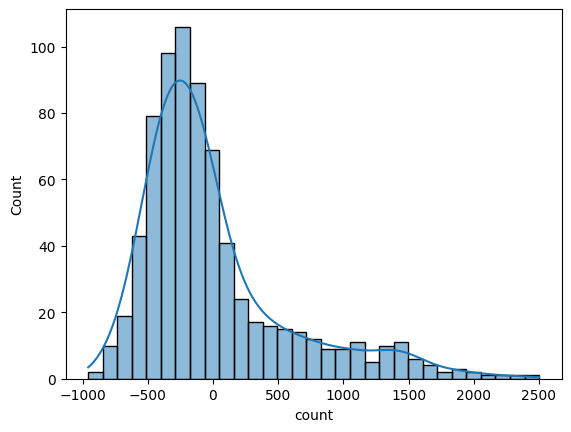

In [18]:
y_pred = final_model.predict(final_X_train)
final_residuals = y_train - y_pred
sns.histplot(final_residuals, kde=True)

## 6. Evaluate R^2

In [19]:
print("Final Model R^2:", final_model.score(final_X_train, y_train))

Final Model R^2: 0.9131302916095627


Residuals seem to be fairly normally distributed. The R^2 is quite high, so I fear the data may be overfitted, but it seems good for now. A lot of variables couldn't be used, so maybe Linear Regression is not the best model for this, or different data needs to be collected.